# Part 0 - K Means Clustering 1

In [34]:
#1. Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [2]:
#1. Dataframe 1 is unlabelled
dfUnlabel = pd.read_csv("glass_unlabelled.csv")

In [3]:
dfUnlabel.head()

# RI is Refractive Index

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [7]:
#2. Drop the refractive index
dfUN = dfUnlabel.drop(["RI"], axis = 1)

dfUN.head()

,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [8]:
#2a. For loop to determine k
km = KMeans()

wcss = []

for k in range(1,12):
    km = KMeans(n_clusters = k)
    km.fit(dfUnlabel) 
    wcss.append(km.inertia_)

AttributeError: 'NoneType' object has no attribute 'split'

ValueError: x and y must have same first dimension, but have shapes (11,) and (0,)

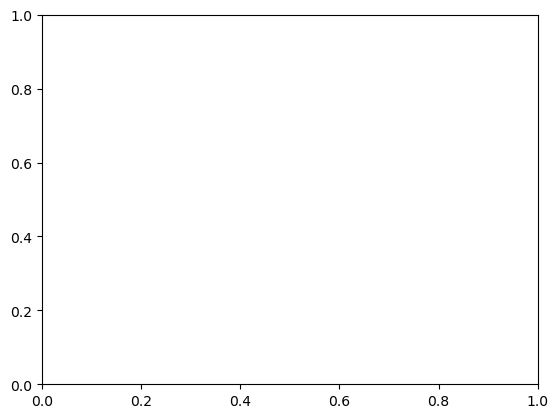

In [9]:
#2b. Plot the K value against WCSS
plt.plot(range(1,12), wcss)

# The ideal number of clusters should be 5 as the graph becomes linear immediately after.

In [11]:

km = KMeans(n_clusters = 5)
km.fit(dfUN)

KMeans(n_clusters=5)

In [12]:
centers = km.cluster_centers_
centers

array([[1.37976190e+01, 3.22047619e+00, 1.13738095e+00, 7.18526190e+01,
        2.51904762e-01, 9.53238095e+00, 7.11904762e-02, 6.11904762e-02],
       [1.45125000e+01, 1.53571429e-01, 2.08500000e+00, 7.34007143e+01,
        1.96785714e-01, 8.64964286e+00, 9.16428571e-01, 1.39285714e-02],
       [1.27352632e+01, 2.59473684e-01, 1.32210526e+00, 7.25357895e+01,
        2.56315789e-01, 1.25184211e+01, 1.65789474e-01, 6.94736842e-02],
       [1.31336585e+01, 3.49593496e+00, 1.39739837e+00, 7.28041463e+01,
        5.93414634e-01, 8.31300813e+00, 4.60162602e-02, 6.43902439e-02],
       [1.30100000e+01, 0.00000000e+00, 3.03000000e+00, 7.05900000e+01,
        6.21000000e+00, 6.94500000e+00, 0.00000000e+00, 0.00000000e+00]])

In [13]:
km.labels_

array([0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 0,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 0, 3, 3, 3, 0,
       3, 0, 3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 2, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3,
       3, 3, 3, 0, 0, 0, 0, 3, 0, 3, 0, 2, 2, 2, 1, 2, 2, 4, 4, 2, 0, 2,
       0, 0, 0, 0, 1, 1, 2, 2, 1, 3, 3, 3, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [14]:
#2c. Create a new column with the number of k clusters decided

dfUnlabel["pred_labels"] = km.labels_

In [15]:
#3. Create a new dataframe with the labelled glass
dfLabel = pd.read_csv("glass_labelled.csv")

In [16]:
dfLabel.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [17]:
#3a. There are 7 types of glass and what was shown earlier is 5. It could have been more similar, but it was a close prediction.

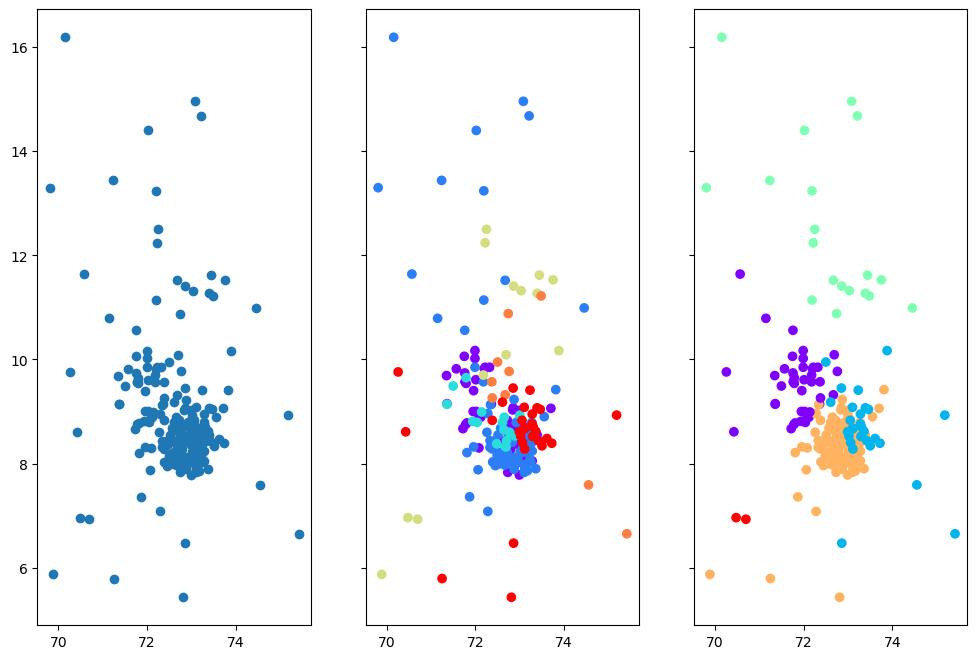

In [19]:
#3b. Si versus Ca Scatterplot
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, sharey = True, figsize = (12,8))

ax1.scatter(x = dfLabel["Si"], y = dfLabel["Ca"])

ax2.scatter(x = dfLabel["Si"], y = dfLabel["Ca"], c = dfLabel["Type"], cmap = "rainbow")

ax3.scatter(x = dfLabel["Si"], y = dfLabel["Ca"], c = dfUnlabel["pred_labels"], cmap = "rainbow")

# Part 1 - Exploratory Data Analysis

C:\Users\Usama\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type', ylabel='count'>

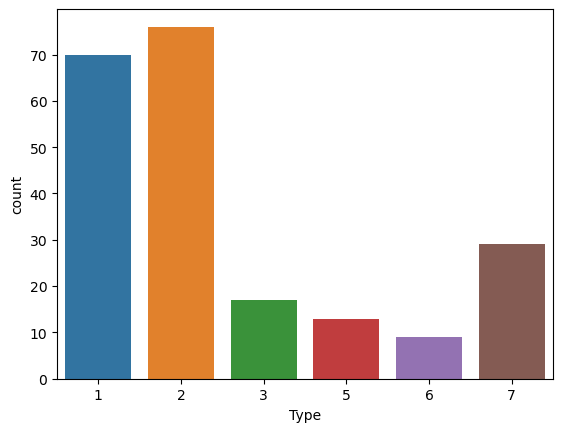

In [20]:
#1. Distribution of different types of glasses? 

sns.countplot(dfLabel["Type"])

# The dataset is unbalanced as types 1 and 2 are a lot more in value than the rest. Also shows that there are only 6 types.

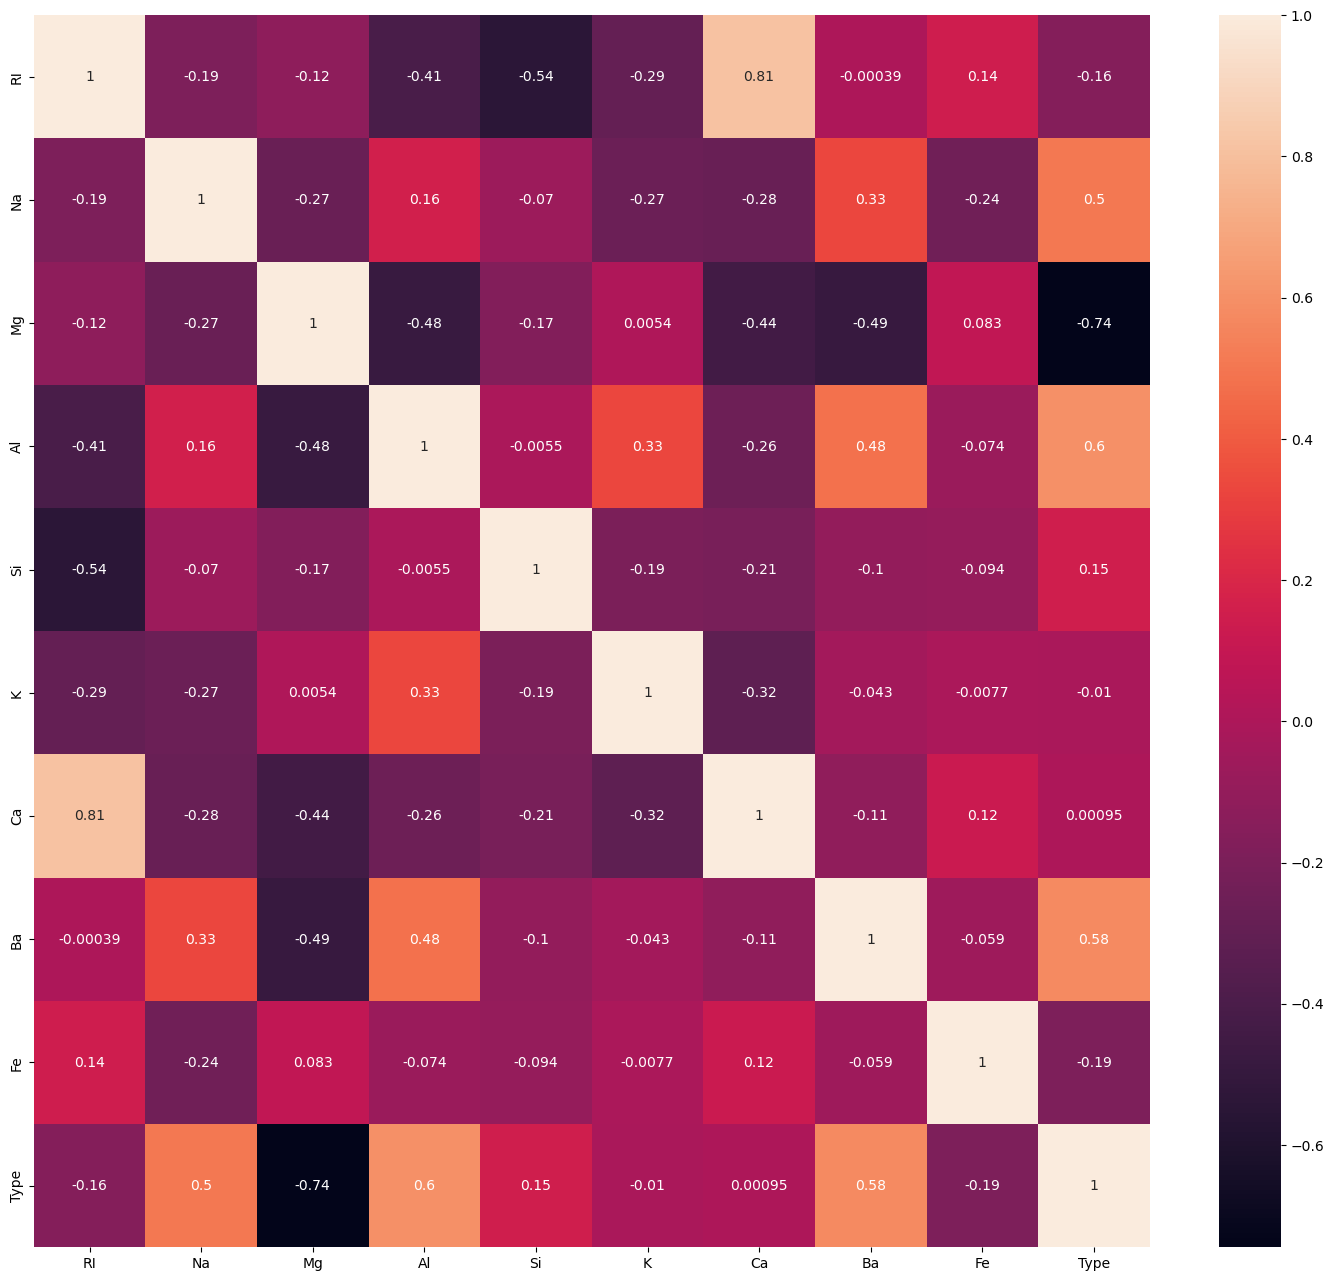

In [21]:
#2a. Correlation heat plot
fig = plt.figure(figsize = (18,16))
sns.heatmap(dfLabel.corr(), annot = True)
plt.show()

#None of the features show a strong correlation to one another except for a few outliers.

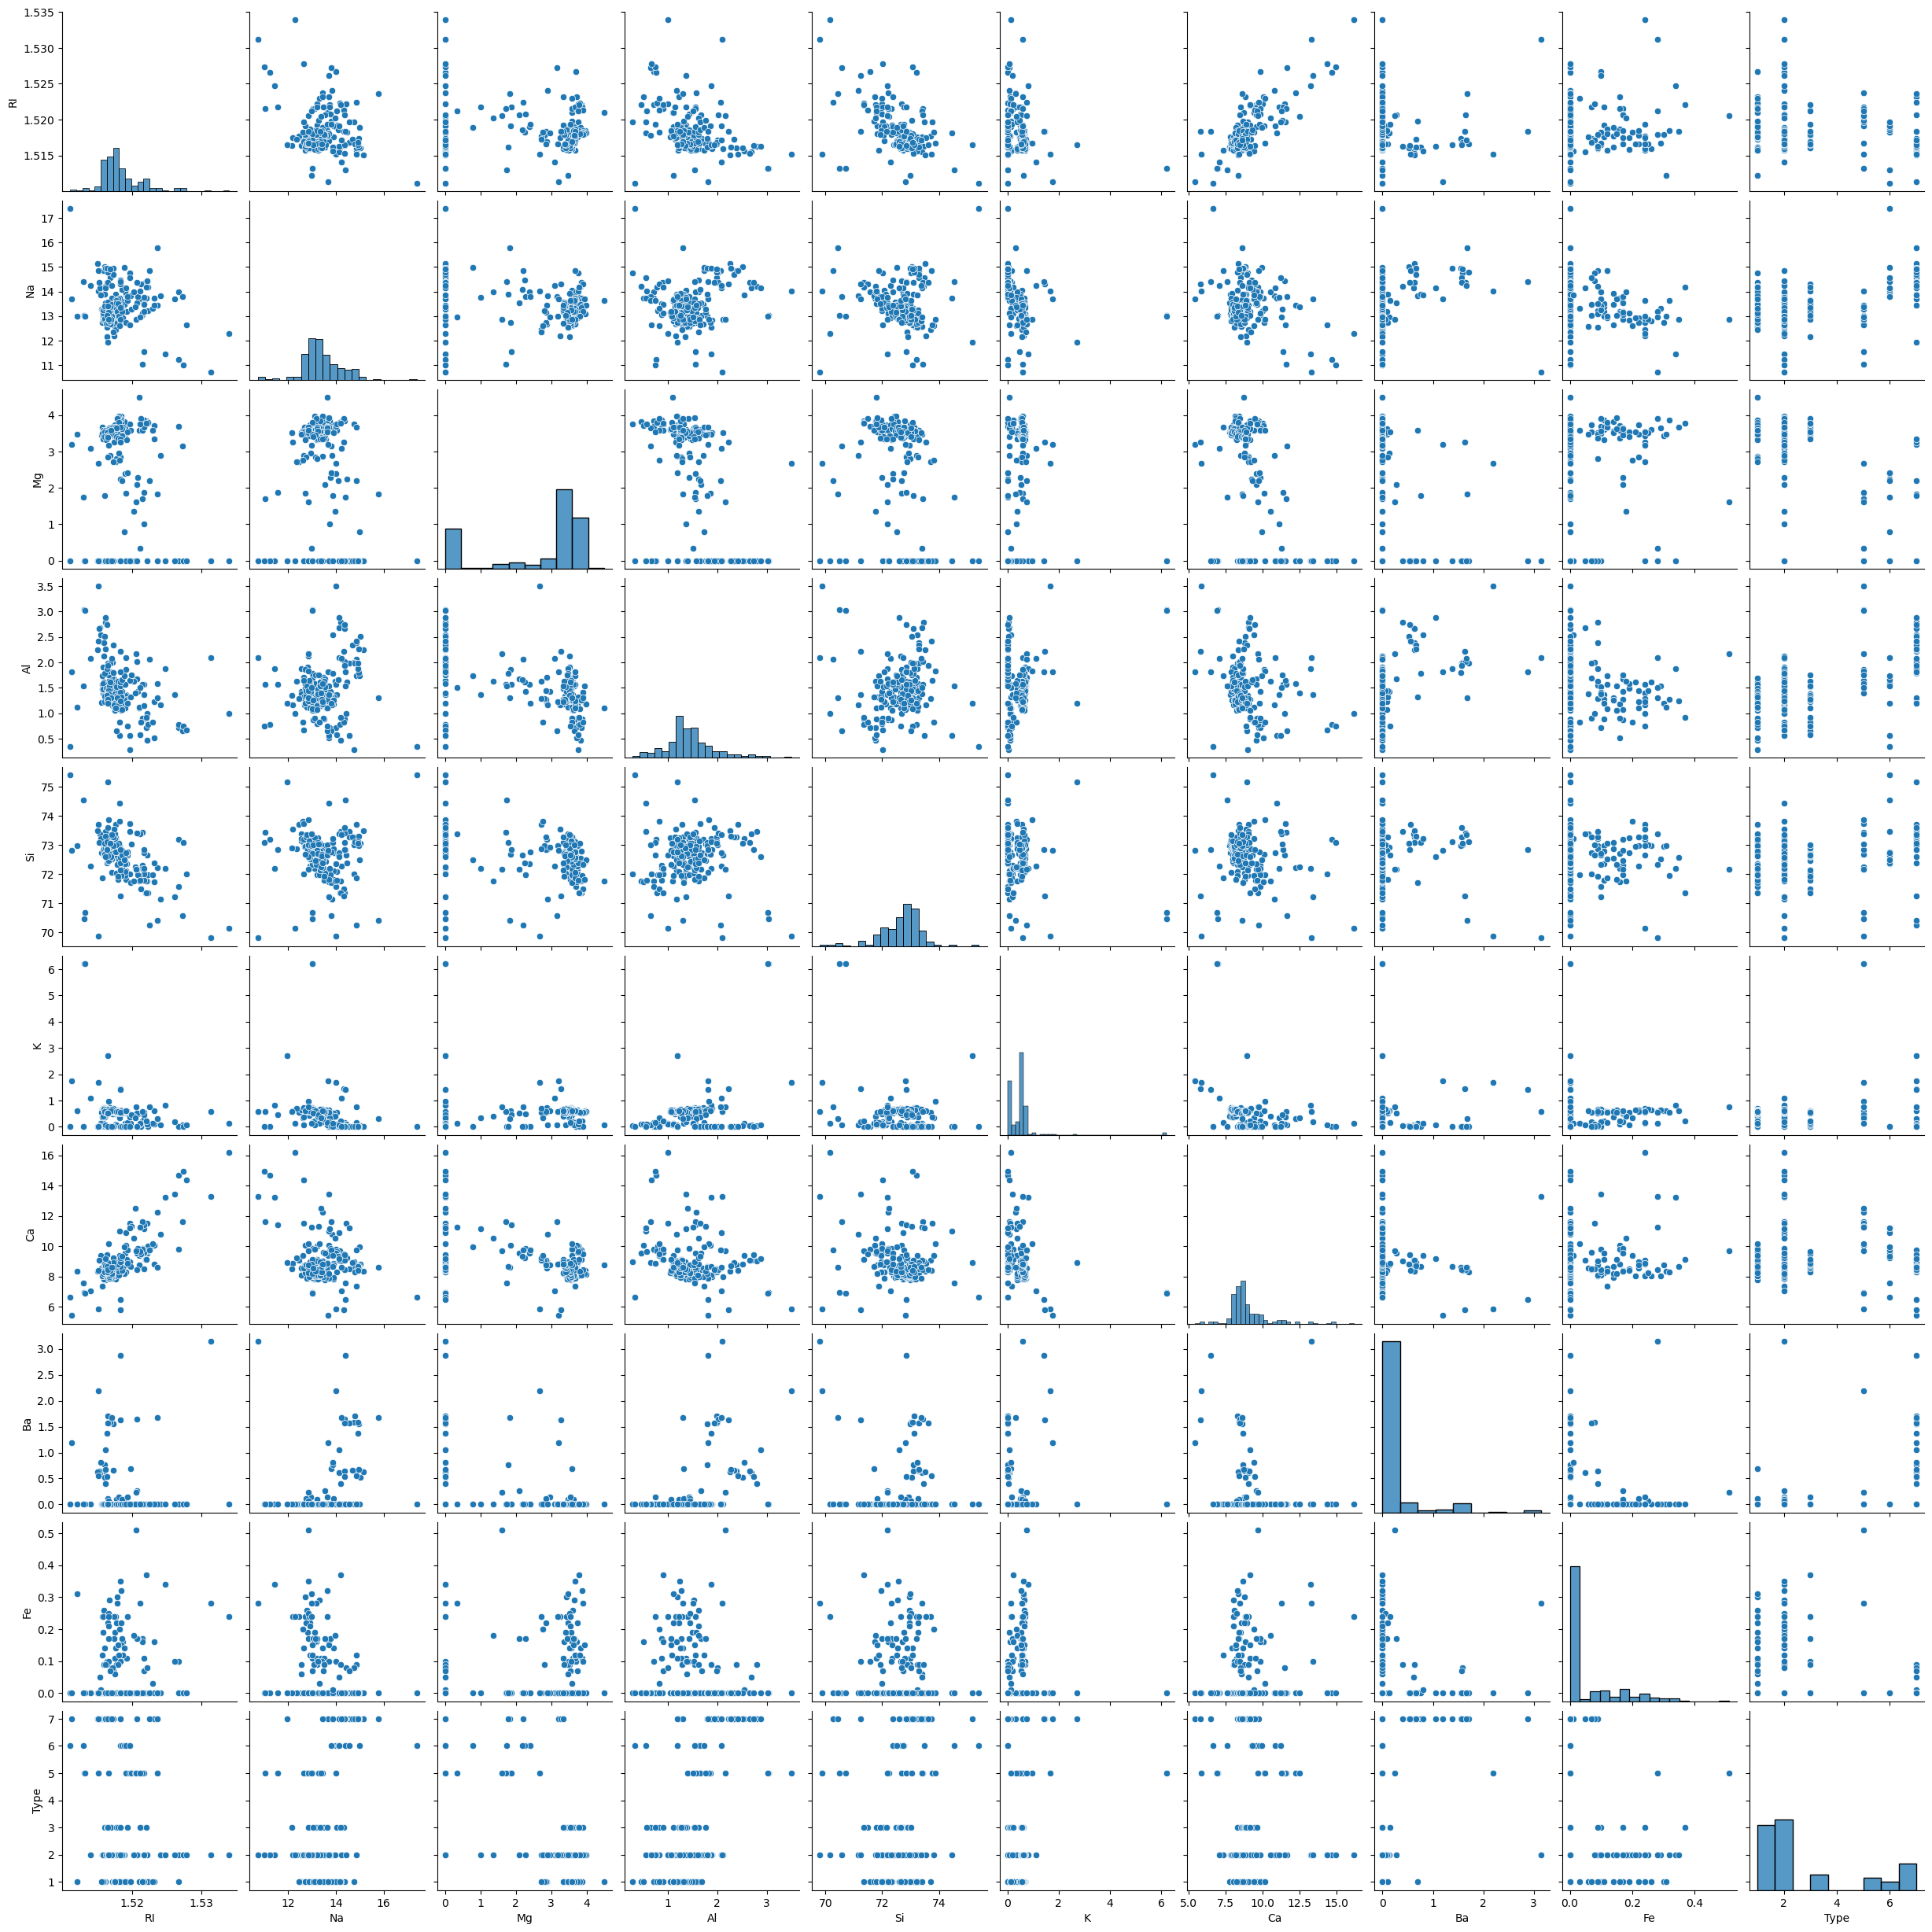

In [22]:
# Pairplot
sns.pairplot(data=dfLabel)

# The plots do not show any semblance of a balanced data as well which further suggests that these features are not correlated.

Text(0, 0.5, 'Type')

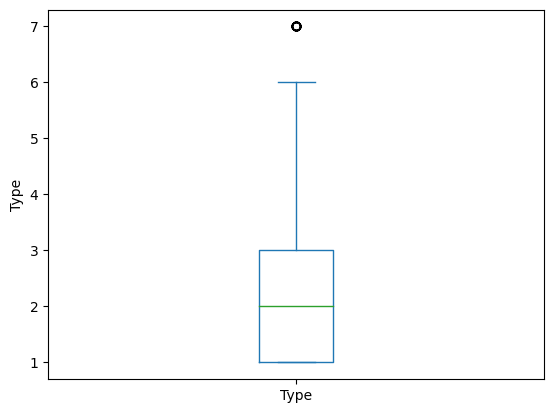

In [23]:
# Boxplot

ax = dfLabel["Type"].plot.box()
ax.set_ylabel("Type")

# The dataset are heavily skewed with an outlier at Type 7.

In [25]:
#2b. It is good to drop the refractive index feature as it has no significant correlation on any of the other features.

dfLabel2 = dfLabel.drop(["RI"], axis = 1)

# Part 2 - Baseline Models

In [26]:
#1. Assign the x, y, and perform scaling on the x data

x = dfLabel2.drop(["Type"], axis=1)
y = dfLabel2["Type"]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.3)

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [29]:
#2a. GridSearchCV
grid_params = {
    "kernel":["rbf","poly","sigmoid"],
    "C":[0.1,1,10,100,1000],
    "gamma": [0.001,0.01,0.1,1],
    "degree":[1,2,3],
}

gs = GridSearchCV(
    SVC(),
    grid_params,
    cv = 3
)

gs_results = gs.fit(x_train_scaled, y_train)

print(gs_results.best_score_)
print(gs_results.best_estimator_)
print(gs_results.best_params_)

0.6917006802721088
SVC(C=100, degree=1, gamma=0.01)
{'C': 100, 'degree': 1, 'gamma': 0.01, 'kernel': 'rbf'}


In [30]:
#2b. Use SVC with the hyperparameters and print the model score, accuracy, confusion matrix, and what is misclassified. 
svc = SVC(C=1000, degree = 1, gamma = 0.01, kernel = 'rbf')
svc.fit(x_train_scaled, y_train)

print(svc.score(x_train_scaled,y_train))

y_pred_svc = svc.predict(x_test_scaled)
print(metrics.accuracy_score(y_test, y_pred_svc))

print(metrics.confusion_matrix(y_pred_svc, y_test))
print(metrics.classification_report(y_pred_svc,y_test))

#Types 1, 2, and 7 are being misclassified.
# The model and accuracy score is at 0.83 and 0.69 respectively which will hopefully increase once we balance our data.

0.8389261744966443
0.6923076923076923
[[18  9  2  0  0  0]
 [ 7 18  1  0  0  1]
 [ 0  0  0  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  5]]
              precision    recall  f1-score   support

           1       0.72      0.62      0.67        29
           2       0.67      0.67      0.67        27
           3       0.00      0.00      0.00         0
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         3
           7       0.83      1.00      0.91         5

    accuracy                           0.69        65
   macro avg       0.70      0.71      0.71        65
weighted avg       0.72      0.69      0.71        65



C:\Users\Usama\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usama\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usama\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
#3a. Hyperparameter for Random Forest Model

grid_params = {
    "n_estimators":[100,150,200,250,300,350,400],
    "max_features":["sqrt","log2"],
    "max_depth": [4,6,8,10,12],
}

gs = GridSearchCV(
    RandomForestClassifier(),
    grid_params,
    cv = 3
)

gs_results = gs.fit(x_train_scaled, y_train)

print(gs_results.best_score_)
print(gs_results.best_estimator_)
print(gs_results.best_params_)

0.7387755102040816
RandomForestClassifier(max_depth=6, max_features='sqrt', n_estimators=400)
{'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 400}


In [32]:
#3b. RFC with new parameters

rf = RandomForestClassifier(max_depth = 6, max_features='sqrt', n_estimators = 400)
rf.fit(x_train_scaled, y_train)

print(rf.score(x_train_scaled, y_train))

y_pred_rf = rf.predict(x_test_scaled)
print(metrics.accuracy_score(y_test, y_pred_rf))

cm = metrics.confusion_matrix(y_test, y_pred_rf)
print(cm)

results = metrics.classification_report(y_test, y_pred_rf)
print(results)

# The model score is an improvement, but the accuracy score stayed the same.

0.8993288590604027
0.6923076923076923
[[17  8  0  0  0  0]
 [ 7 20  0  0  0  0]
 [ 2  1  0  0  0  0]
 [ 0  0  0  1  0  0]
 [ 1  0  0  0  2  0]
 [ 0  1  0  0  0  5]]
              precision    recall  f1-score   support

           1       0.63      0.68      0.65        25
           2       0.67      0.74      0.70        27
           3       0.00      0.00      0.00         3
           5       1.00      1.00      1.00         1
           6       1.00      0.67      0.80         3
           7       1.00      0.83      0.91         6

    accuracy                           0.69        65
   macro avg       0.72      0.65      0.68        65
weighted avg       0.67      0.69      0.68        65



C:\Users\Usama\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usama\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usama\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
#4a. MLP Classifier Hyper Parameters
grid_params = {
    "activation":["relu", "logistic"],
    "hidden_layer_sizes":[(10),(20),(20,20),(30),(20,20,20)],
    "alpha":[0.0001,0.005,0.01],
    "max_iter":[6000]
}

gs = GridSearchCV(
    MLPClassifier(),
    grid_params,
    cv = 3
)

gs_results = gs.fit(x_train_scaled, y_train)

print(gs_results.best_score_)
print(gs_results.best_estimator_)
print(gs_results.best_params_)

0.6515646258503401
MLPClassifier(alpha=0.01, hidden_layer_sizes=10, max_iter=6000)
{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': 10, 'max_iter': 6000}


In [38]:
#4b. MLP 
mlp = MLPClassifier(activation='relu', alpha=0.01, hidden_layer_sizes=(10), max_iter = 6000)
mlp.fit(x_train_scaled, y_train)
print(mlp.score(x_train_scaled, y_train))

y_pred_mlp = mlp.predict(x_test_scaled)
print(metrics.accuracy_score(y_test, y_pred_mlp))

print(metrics.confusion_matrix(y_test, y_pred_mlp))

results = metrics.classification_report(y_test, y_pred_mlp)
print(results)

# Model score decreased and acurracy score slightly increased.
# The accuracy score remained mosty the same throughout the three classifiers while model score decreased a lot for MLP.
# The types of glasses are still being classified incorrectly 

0.825503355704698
0.7076923076923077
[[18  4  2  0  0  1]
 [ 6 21  0  0  0  0]
 [ 2  1  0  0  0  0]
 [ 0  0  0  0  0  1]
 [ 1  0  0  0  2  0]
 [ 0  0  0  1  0  5]]
              precision    recall  f1-score   support

           1       0.67      0.72      0.69        25
           2       0.81      0.78      0.79        27
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         1
           6       1.00      0.67      0.80         3
           7       0.71      0.83      0.77         6

    accuracy                           0.71        65
   macro avg       0.53      0.50      0.51        65
weighted avg       0.70      0.71      0.70        65



# Part 3 - Fixing the Imbalance and Model Improvement

In [39]:
#1. and 2. Balance the data using SMOTE
x2 = dfLabel2.drop(["Type"], axis = 1)
y2 = dfLabel2["Type"]

sm = SMOTE()

x_bal, y_bal = sm.fit_resample(x2, y2)
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_bal, y_bal, test_size = 0.3)

scaler = StandardScaler()

x_train_scaled2 = scaler.fit_transform(x_train2)
x_test_scaled2 = scaler.transform(x_test2)

In [40]:
#3a Retrain SVC
grid_params = {
    "kernel":["rbf","poly","sigmoid"],
    "C":[0.1,1,10,100,1000],
    "gamma": [0.001,0.01,0.1,1],
    "degree":[1,2,3],
}

gs = GridSearchCV(
    SVC(),
    grid_params,
    cv = 3
)

gs_results = gs.fit(x_train_scaled2, y_train2)

print(gs_results.best_score_)
print(gs_results.best_estimator_)
print(gs_results.best_params_)

0.8244577675894904
SVC(C=100, degree=1, gamma=0.1)
{'C': 100, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [43]:
svc = SVC(C=100, degree = 1, gamma = 0.1, kernel = 'rbf')
svc.fit(x_train_scaled2, y_train2)

print(svc.score(x_train_scaled2, y_train2))

y_pred_svc2 = svc.predict(x_test_scaled2)
print(metrics.accuracy_score(y_test2, y_pred_svc2))

print(metrics.confusion_matrix(y_pred_svc2, y_test2))
print(metrics.classification_report(y_pred_svc2, y_test2))

# The hyper parameters changed slightly, model score and accuracy score increased.

0.9278996865203761
0.8248175182481752
[[12  6  1  0  0  0]
 [ 4 13  0  0  0  0]
 [ 8  1 15  0  0  1]
 [ 0  0  0 22  0  0]
 [ 0  2  0  0 25  0]
 [ 0  0  0  1  0 26]]
              precision    recall  f1-score   support

           1       0.50      0.63      0.56        19
           2       0.59      0.76      0.67        17
           3       0.94      0.60      0.73        25
           5       0.96      1.00      0.98        22
           6       1.00      0.93      0.96        27
           7       0.96      0.96      0.96        27

    accuracy                           0.82       137
   macro avg       0.82      0.81      0.81       137
weighted avg       0.85      0.82      0.83       137



In [42]:
#3b. Retrain Random Forest
grid_params = {
    "n_estimators":[100,150,200,250,300,350,400],
    "max_features":["sqrt","log2"],
    "max_depth": [4,6,8,10,12],
}

gs = GridSearchCV(
    RandomForestClassifier(),
    grid_params,
    cv = 3
)

gs_results = gs.fit(x_train_scaled2, y_train2)

print(gs_results.best_score_)
print(gs_results.best_estimator_)
print(gs_results.best_params_)

0.8494974431317228
RandomForestClassifier(max_depth=8, max_features='sqrt')
{'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 100}


In [44]:
rf = RandomForestClassifier(max_depth = 8, max_features='sqrt', n_estimators = 100)
rf.fit(x_train_scaled2, y_train2)

print(rf.score(x_train_scaled2, y_train2))

y_pred_rf2 = rf.predict(x_test_scaled2)
print(metrics.accuracy_score(y_test2, y_pred_rf2))

cm = metrics.confusion_matrix(y_test2, y_pred_rf2)
print(cm)

results = metrics.classification_report(y_test2, y_pred_rf2)
print(results)

# Model score and accuracy score increased once again. Type 1 and 3 are somewhat still misclassified.

0.9937304075235109
0.8759124087591241
[[16  2  6  0  0  0]
 [ 5 15  1  0  0  1]
 [ 1  0 15  0  0  0]
 [ 0  0  0 23  0  0]
 [ 0  0  0  0 25  0]
 [ 0  0  1  0  0 26]]
              precision    recall  f1-score   support

           1       0.73      0.67      0.70        24
           2       0.88      0.68      0.77        22
           3       0.65      0.94      0.77        16
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        25
           7       0.96      0.96      0.96        27

    accuracy                           0.88       137
   macro avg       0.87      0.87      0.87       137
weighted avg       0.89      0.88      0.88       137



In [45]:
#3c. Retrain MLP
grid_params = {
    "activation":["relu", "logistic"],
    "hidden_layer_sizes":[(10),(20),(20,20),(30),(20,20,20)],
    "alpha":[0.0001,0.005,0.01],
    "max_iter":[6000]
}

gs = GridSearchCV(
    MLPClassifier(),
    grid_params,
    cv = 3
)

gs_results = gs.fit(x_train_scaled2, y_train2)

print(gs_results.best_score_)
print(gs_results.best_estimator_)
print(gs_results.best_params_)

0.8087344971492388
MLPClassifier(hidden_layer_sizes=(20, 20, 20), max_iter=6000)
{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (20, 20, 20), 'max_iter': 6000}


In [46]:
mlp = MLPClassifier(activation='relu', alpha=0.0001, hidden_layer_sizes=(20, 20, 20), max_iter = 6000)
mlp.fit(x_train_scaled2, y_train2)
print(mlp.score(x_train_scaled2, y_train2))

y_pred_mlp2 = mlp.predict(x_test_scaled2)
print(metrics.accuracy_score(y_test2, y_pred_mlp2))

print(metrics.confusion_matrix(y_test2, y_pred_mlp2))

results = metrics.classification_report(y_test2, y_pred_mlp2)
print(results)

1.0
0.8248175182481752
[[11  6  7  0  0  0]
 [ 4 13  1  2  1  1]
 [ 1  0 15  0  0  0]
 [ 0  0  0 23  0  0]
 [ 0  0  0  0 25  0]
 [ 0  0  1  0  0 26]]
              precision    recall  f1-score   support

           1       0.69      0.46      0.55        24
           2       0.68      0.59      0.63        22
           3       0.62      0.94      0.75        16
           5       0.92      1.00      0.96        23
           6       0.96      1.00      0.98        25
           7       0.96      0.96      0.96        27

    accuracy                           0.82       137
   macro avg       0.81      0.82      0.81       137
weighted avg       0.82      0.82      0.82       137



In [ ]:
#3d.
# The best scoring model is the balanced MLP, however the accuracy score is the worst one of the three.
# Balanced RFC had the best precision and an almost perfect model score. 
# Balancing the data is necessary when building models as it greatly improves the classification report as well as the scores for both accuracy and model.

# Honors Addendum - Outlier Removal

In [59]:
#1. Remove the outliers in Ca and K

dfNew = pd.read_csv("glass_labelled.csv")

columns = ['Ca', 'K'] 

Quart1 = dfNew[columns].quantile(0.25)

Quart3 = dfNew[columns].quantile(0.75)

IQR = Quart3 - Quart1

dfNew= dfNew[~((dfNew[columns] < (Quart1 - 1.5 * IQR)) | (dfNew[columns] > (Quart3 + 1.5 * IQR))).any(axis = 1)]

# removes outliers in Ca and K from outside the IQR range

In [64]:
#2. Balance the dataframe, Error was given sample was less than neighbors
x3 = dfNew.drop(["Type"], axis = 1)
y3 = dfNew["Type"]

# sm = SMOTE()

x_bal2, y_bal2 = SMOTE(k_neighbors = 2).fit_resample(x3, y3)
x_train3, x_test3, y_train3, y_test3 = train_test_split(x_bal2, y_bal2, test_size = 0.3)

scaler = StandardScaler()

x_train_scaled3 = scaler.fit_transform(x_train3)
x_test_scaled3 = scaler.transform(x_test3)

In [65]:
#3a. Retrain SVC again
grid_params = {
    "kernel":["rbf","poly","sigmoid"],
    "C":[0.1,1,10,100,1000],
    "gamma": [0.001,0.01,0.1,1],
    "degree":[1,2,3],
}

gs = GridSearchCV(
    SVC(),
    grid_params,
    cv = 3
)

gs_results = gs.fit(x_train_scaled3, y_train3)

print(gs_results.best_score_)
print(gs_results.best_estimator_)
print(gs_results.best_params_)

0.891156462585034
SVC(C=10, degree=1, gamma=1)
{'C': 10, 'degree': 1, 'gamma': 1, 'kernel': 'rbf'}


In [66]:
svc = SVC(C=10, degree = 1, gamma = 1, kernel = 'rbf')
svc.fit(x_train_scaled3, y_train3)

print(svc.score(x_train_scaled3, y_train3))

y_pred_svc3 = svc.predict(x_test_scaled3)
print(metrics.accuracy_score(y_test3, y_pred_svc3))

print(metrics.confusion_matrix(y_pred_svc3, y_test3))
print(metrics.classification_report(y_pred_svc3, y_test3))

# Model score and accuracy score is a lot higher than previous attempts, now that data has less outliers

1.0
0.9206349206349206
[[15  3  0  0  0  0]
 [ 3 17  0  0  0  2]
 [ 1  1 20  0  0  0]
 [ 0  0  0 25  0  0]
 [ 0  0  0  0 19  0]
 [ 0  0  0  0  0 20]]
              precision    recall  f1-score   support

           1       0.79      0.83      0.81        18
           2       0.81      0.77      0.79        22
           3       1.00      0.91      0.95        22
           5       1.00      1.00      1.00        25
           6       1.00      1.00      1.00        19
           7       0.91      1.00      0.95        20

    accuracy                           0.92       126
   macro avg       0.92      0.92      0.92       126
weighted avg       0.92      0.92      0.92       126



In [67]:
#3b. Retrain RFC again
grid_params = {
    "n_estimators":[100,150,200,250,300,350,400],
    "max_features":["sqrt","log2"],
    "max_depth": [4,6,8,10,12],
}

gs = GridSearchCV(
    RandomForestClassifier(),
    grid_params,
    cv = 3
)

gs_results = gs.fit(x_train_scaled3, y_train3)

print(gs_results.best_score_)
print(gs_results.best_estimator_)
print(gs_results.best_params_)

0.914965986394558
RandomForestClassifier(max_depth=10, max_features='log2', n_estimators=200)
{'max_depth': 10, 'max_features': 'log2', 'n_estimators': 200}


In [68]:
rf = RandomForestClassifier(max_depth = 10, max_features='log2', n_estimators = 200)
rf.fit(x_train_scaled3, y_train3)

print(rf.score(x_train_scaled3, y_train3))

y_pred_rf3 = rf.predict(x_test_scaled3)
print(metrics.accuracy_score(y_test3, y_pred_rf3))

cm = metrics.confusion_matrix(y_test3, y_pred_rf3)
print(cm)

results = metrics.classification_report(y_test3, y_pred_rf3)
print(results)

# Model score is perfect, but accuracy score is less than SVC which is unexpected from previous two training attempts.

1.0
0.9047619047619048
[[14  4  1  0  0  0]
 [ 0 20  1  0  0  0]
 [ 2  2 16  0  0  0]
 [ 0  0  0 25  0  0]
 [ 0  0  0  0 19  0]
 [ 0  0  0  2  0 20]]
              precision    recall  f1-score   support

           1       0.88      0.74      0.80        19
           2       0.77      0.95      0.85        21
           3       0.89      0.80      0.84        20
           5       0.93      1.00      0.96        25
           6       1.00      1.00      1.00        19
           7       1.00      0.91      0.95        22

    accuracy                           0.90       126
   macro avg       0.91      0.90      0.90       126
weighted avg       0.91      0.90      0.90       126



In [69]:
#3c. Retrain MLP again
grid_params = {
    "activation":["relu", "logistic"],
    "hidden_layer_sizes":[(10),(20),(20,20),(30),(20,20,20)],
    "alpha":[0.0001,0.005,0.01],
    "max_iter":[6000]
}

gs = GridSearchCV(
    MLPClassifier(),
    grid_params,
    cv = 3
)

gs_results = gs.fit(x_train_scaled3, y_train3)

print(gs_results.best_score_)
print(gs_results.best_estimator_)
print(gs_results.best_params_)

0.891156462585034
MLPClassifier(hidden_layer_sizes=(20, 20), max_iter=6000)
{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (20, 20), 'max_iter': 6000}


In [70]:
mlp = MLPClassifier(activation ='relu', alpha = 0.0001, hidden_layer_sizes=(20, 20), max_iter = 6000)
mlp.fit(x_train_scaled3, y_train3)
print(mlp.score(x_train_scaled3, y_train3))

y_pred_mlp3 = mlp.predict(x_test_scaled3)
print(metrics.accuracy_score(y_test3, y_pred_mlp3))

print(metrics.confusion_matrix(y_test3, y_pred_mlp3))

results = metrics.classification_report(y_test3, y_pred_mlp3)
print(results)

0.9965986394557823
0.9206349206349206
[[16  1  2  0  0  0]
 [ 3 16  1  1  0  0]
 [ 2  0 18  0  0  0]
 [ 0  0  0 25  0  0]
 [ 0  0  0  0 19  0]
 [ 0  0  0  0  0 22]]
              precision    recall  f1-score   support

           1       0.76      0.84      0.80        19
           2       0.94      0.76      0.84        21
           3       0.86      0.90      0.88        20
           5       0.96      1.00      0.98        25
           6       1.00      1.00      1.00        19
           7       1.00      1.00      1.00        22

    accuracy                           0.92       126
   macro avg       0.92      0.92      0.92       126
weighted avg       0.92      0.92      0.92       126



In [ ]:
#3d. 
# The model with the highest accuracy is tied with MLP and SVC
# The model with the highest model score are pretty much all three.
# Removing outliers can vastly improve prediction power which can implemnted in our project as well.
# Balancing the data should be done too to obtain the best results.
# The classification report across all three models boasted high results for precision and recall. 
# Overall this lab further provided us evidence that datasets should be kept balanced and outliers can be removed in order to improve predictions with our models.
